In [39]:
#!/usr/bin/env python3
###-----------------------------------------------------------##
#@author narumeena
#@description -applying bayesian optimization on random forest 
#             -using hyperopt library 
###-----------------------------------------------------------##

In [40]:
#import libraries 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split # split the dataset into traninig and testing dataset 

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc                # to import roc curve abd auc metrics for evaluation 
#from sklearn.grid_search import GridSearchCV              # grid search is used for hyperparameters-optimization
from sklearn.model_selection import KFold                # cross validation using the kfold algorithm
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials     # library for hyperparameters-optimization
from sklearn.model_selection import cross_val_score

import seaborn as sns                                     # Python graphing library
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#import data from filterd dataset with maximum 30% files 
filtredAttributes = pd.read_csv("../analysis/trainingDataSet/case_control_filtred.csv", sep=",")
filtredAttributes.shape

(138665, 56)

In [42]:
filtredAttributes.head()

,Ref,Alt,Consequence,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,...,EncodeH3K27ac-max,EncodeH3K27me3-max,EncodeH3K36me3-max,EncodeH3K79me2-max,EncodeH4K20me1-max,EncodeH2AFZ-max,EncodeDNase-max,EncodetotalRNA-max,RemapOverlapTF,category
0,C,T,STOP_GAINED,0.715,0.253,6715,185,0.011,0.001,0.0,...,0.82,1.71,4.85,5.68,9.77,3.58,0.35,9.02,21.0,1
1,C,T,REGULATORY,0.715,0.253,6715,185,0.011,0.001,0.0,...,0.82,1.71,4.85,5.68,9.77,3.58,0.35,9.02,21.0,1
2,G,A,NON_SYNONYMOUS,0.609,0.120,212,2176,0.039,0.984,1.0,...,0.92,2.15,4.78,2.63,1.94,0.87,0.37,4.20,9.0,1
3,G,A,UPSTREAM,0.609,0.120,212,2176,0.039,0.984,1.0,...,0.92,2.15,4.78,2.63,1.94,0.87,0.37,4.20,9.0,1
4,A,C,NON_SYNONYMOUS,0.675,0.213,814,1969,0.192,0.999,1.0,...,2.89,1.20,5.65,28.99,2.07,3.21,0.34,2.89,39.0,1


In [43]:
pd.options.display.max_rows = 4000
filtredAttributes.isnull().sum()

Ref                       0
Alt                       0
Consequence               0
GC                        0
CpG                       0
minDistTSS                0
minDistTSE                0
priPhCons               143
mamPhCons               143
verPhCons               143
priPhyloP               143
mamPhyloP               143
verPhyloP               143
bStatistic             1058
cHmm_E1                   0
cHmm_E2                   0
cHmm_E3                   0
cHmm_E4                   0
cHmm_E5                   0
cHmm_E6                   0
cHmm_E7                   0
cHmm_E8                   0
cHmm_E9                   0
cHmm_E10                  0
cHmm_E11                  0
cHmm_E12                  0
cHmm_E13                  0
cHmm_E14                  0
cHmm_E15                  0
cHmm_E16                  0
cHmm_E17                  0
cHmm_E18                  0
cHmm_E19                  0
cHmm_E20                  0
cHmm_E21                  0
cHmm_E22            

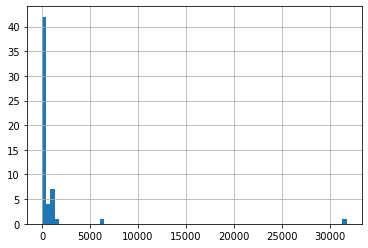

In [44]:
filtredAttributes.isnull().sum().hist(bins=74)

In [45]:
#missing values 

filtredAttributes['priPhCons'].fillna(0.115,inplace=True)
filtredAttributes['mamPhCons'].fillna(0.079,inplace=True)
filtredAttributes['verPhCons'].fillna(0.094,inplace=True)
filtredAttributes['priPhyloP'].fillna(-0.033,inplace=True)
filtredAttributes['mamPhyloP'].fillna(-0.038,inplace=True)
filtredAttributes['verPhyloP'].fillna(0.017,inplace=True)
filtredAttributes['bStatistic'].fillna(800.261,inplace=True)
filtredAttributes['minDistTSS'].fillna(10000000,inplace=True)
filtredAttributes['minDistTSE'].fillna(10000000,inplace=True)
filtredAttributes['RemapOverlapTF'].fillna(0.5,inplace=True)
filtredAttributes['EncodeH3K4me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K36me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K79me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH4K20me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH2AFZ-max'].fillna(0,inplace=True)
filtredAttributes['EncodetotalRNA-max'].fillna(0,inplace=True)
filtredAttributes['EncodeDNase-max'].fillna(0,inplace=True)

In [46]:
pd.options.display.max_rows = 4000
filtredAttributes.isnull().sum()

Ref                   0
Alt                   0
Consequence           0
GC                    0
CpG                   0
minDistTSS            0
minDistTSE            0
priPhCons             0
mamPhCons             0
verPhCons             0
priPhyloP             0
mamPhyloP             0
verPhyloP             0
bStatistic            0
cHmm_E1               0
cHmm_E2               0
cHmm_E3               0
cHmm_E4               0
cHmm_E5               0
cHmm_E6               0
cHmm_E7               0
cHmm_E8               0
cHmm_E9               0
cHmm_E10              0
cHmm_E11              0
cHmm_E12              0
cHmm_E13              0
cHmm_E14              0
cHmm_E15              0
cHmm_E16              0
cHmm_E17              0
cHmm_E18              0
cHmm_E19              0
cHmm_E20              0
cHmm_E21              0
cHmm_E22              0
cHmm_E23              0
cHmm_E24              0
cHmm_E25              0
GerpN                 0
GerpS                 0
EncodeH3K4me1-ma

In [47]:
# One-hot encode the data using pandas get_dummies
filtredAttributes = pd.get_dummies(filtredAttributes)

In [48]:
filtredAttributes.to_csv("../analysis/trainingDataSet/training_one_hot_encoding_Coding_region_only.csv", sep="\t",index=False)

In [29]:
#list of attributes 

features = ['GC', 'CpG', 'minDistTSS', 'minDistTSE', 'priPhCons', 'mamPhCons',
       'verPhCons', 'priPhyloP', 'mamPhyloP', 'verPhyloP', 'bStatistic',
       'cHmm_E1', 'cHmm_E2', 'cHmm_E3', 'cHmm_E4', 'cHmm_E5', 'cHmm_E6',
       'cHmm_E7', 'cHmm_E8', 'cHmm_E9', 'cHmm_E10', 'cHmm_E11', 'cHmm_E12',
       'cHmm_E13', 'cHmm_E14', 'cHmm_E15', 'cHmm_E16', 'cHmm_E17', 'cHmm_E18',
       'cHmm_E19', 'cHmm_E20', 'cHmm_E21', 'cHmm_E22', 'cHmm_E23', 'cHmm_E24',
       'cHmm_E25', 'GerpN', 'GerpS', 'EncodeH3K4me1-max', 'EncodeH3K4me2-max',
       'EncodeH3K4me3-max', 'EncodeH3K9ac-max', 'EncodeH3K9me3-max',
       'EncodeH3K27ac-max', 'EncodeH3K27me3-max', 'EncodeH3K36me3-max',
       'EncodeH3K79me2-max', 'EncodeH4K20me1-max', 'EncodeH2AFZ-max',
       'EncodeDNase-max', 'EncodetotalRNA-max', 'Ref_A', 'Ref_C',
       'Ref_G', 'Ref_T', 'Alt_A', 'Alt_C', 'Alt_G', 'Alt_T',
       'Consequence_3PRIME_UTR', 'Consequence_5PRIME_UTR',
       'Consequence_CANONICAL_SPLICE', 'Consequence_DOWNSTREAM',
       'Consequence_INTRONIC', 'Consequence_NONCODING_CHANGE',
       'Consequence_NON_SYNONYMOUS', 'Consequence_REGULATORY',
       'Consequence_SPLICE_SITE', 'Consequence_STOP_GAINED',
       'Consequence_STOP_LOST', 'Consequence_SYNONYMOUS',
       'Consequence_UPSTREAM']

# Separating out the features
a = filtredAttributes.reindex(columns= features).values
# Separating out the target
b = filtredAttributes.reindex(columns=['category']).values

In [55]:
fiveAttributes = pd.get_dummies(filtredAttributes[[  'minDistTSE', 'priPhCons', 'priPhyloP', 'bStatistic',
       'GerpN', 'GerpS',  'EncodetotalRNA-max','category']])

In [20]:
# Labels are the values we want to predict
labels = filtredAttributes['category']
labels

0         1
1         1
2         1
3         1
4         1
         ..
138660    0
138661    0
138662    0
138663    0
138664    0
Name: category, Length: 138665, dtype: int64

In [32]:
# Remove the labels from the features
# axis 1 refers to the columns
features= filtredAttributes.drop('category', axis = 1)
features.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
0,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,0,0,1,0,0,0
1,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,1,0,0,0,0,0
2,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,1,0,0,0,0,0,0
3,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,0,0,0,0,0,0,1
4,0.675,0.213,814,1969,0.192,0.999,1.0,-1.149,0.850,3.250,...,0,0,0,1,0,0,0,0,0,0


In [33]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [48]:
X_train

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
42192,0.596,0.067,20,10,0.980,0.985,1.000,0.595,2.963,7.708,...,0,0,0,0,0,0,0,0,0,1
46590,0.391,0.013,1915,1832,0.963,1.000,1.000,0.475,3.370,8.687,...,0,0,0,1,0,0,0,0,0,0
78842,0.483,0.013,110247,414677,0.002,0.000,0.000,0.418,-0.820,-0.780,...,0,1,0,0,0,0,0,0,0,0
48882,0.464,0.053,952,306,0.979,0.998,1.000,0.595,1.325,4.270,...,0,0,0,0,0,0,0,0,0,1
33305,0.636,0.027,285,450,0.954,1.000,1.000,0.595,4.396,8.427,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,0.384,0.000,33269,92255,0.032,0.000,0.000,0.475,-0.733,-0.731,...,0,1,0,0,0,0,0,0,0,0
65615,0.464,0.013,22224,17929,0.000,0.000,0.000,-0.393,-1.784,-1.712,...,0,1,0,0,0,0,0,0,0,0
77655,0.424,0.013,2194,687,0.112,0.957,0.998,-1.347,0.129,0.894,...,0,0,0,0,0,0,0,0,0,1
56088,0.530,0.053,669,90,0.212,0.376,1.000,0.391,2.680,7.282,...,0,1,0,0,0,0,0,0,0,0


In [49]:
Y_train

42192    1
46590    1
78842    0
48882    1
33305    1
        ..
82270    0
65615    0
77655    0
56088    1
38408    1
Name: category, Length: 103998, dtype: int64

In [50]:
#Function for model performance using AUC
def performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# XGBoost without hyper parameter optimisation



In [17]:
#import necessary libraries
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(learning_rate = 0.05,
 n_estimators=300,
 max_depth=5)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [19]:

# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.09%


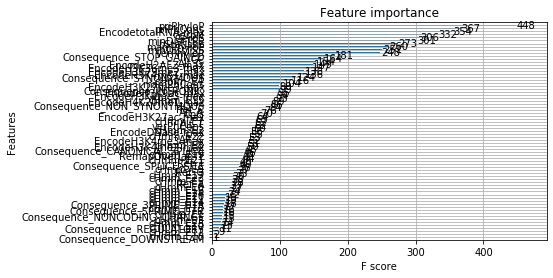

In [20]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.rcParams['figure.figsize'] = [ 50, 20]
plt.show()

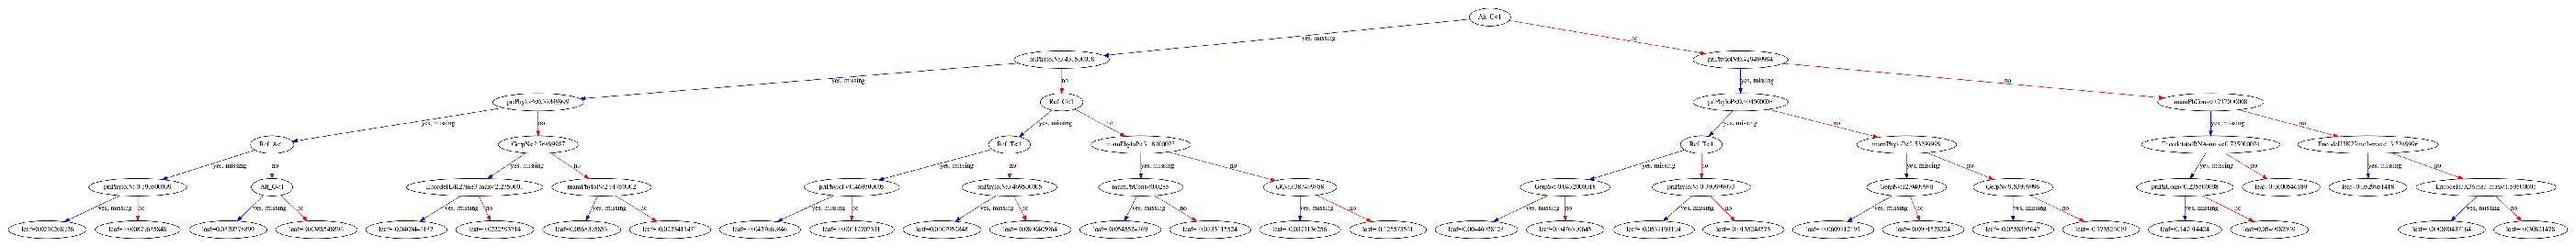

In [21]:
import xgboost as xgb

xgb.plot_tree(model,num_trees=150)
plt.rcParams['figure.figsize'] = [250, 100]
plt.show()

In [22]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]
%time model.fit(X_train, Y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


[0]	validation_0-auc:0.991128	validation_0-error:0.028154	validation_1-auc:0.990936	validation_1-error:0.029596
[1]	validation_0-auc:0.991921	validation_0-error:0.028049	validation_1-auc:0.991723	validation_1-error:0.029654
[2]	validation_0-auc:0.992804	validation_0-error:0.028126	validation_1-auc:0.992778	validation_1-error:0.029625
[3]	validation_0-auc:0.992913	validation_0-error:0.027789	validation_1-auc:0.9929	validation_1-error:0.02948
[4]	validation_0-auc:0.993204	validation_0-error:0.027212	validation_1-auc:0.993208	validation_1-error:0.028961
[5]	validation_0-auc:0.993242	validation_0-error:0.027251	validation_1-auc:0.993272	validation_1-error:0.028904
[6]	validation_0-auc:0.994041	validation_0-error:0.026664	validation_1-auc:0.994145	validation_1-error:0.028327
[7]	validation_0-auc:0.994057	validation_0-error:0.026385	validation_1-auc:0.994155	validation_1-error:0.028125
[8]	validation_0-auc:0.994323	validation_0-error:0.025587	validation_1-auc:0.994383	validation_1-error:0.02

[73]	validation_0-auc:0.998176	validation_0-error:0.016395	validation_1-auc:0.998119	validation_1-error:0.018808
[74]	validation_0-auc:0.998316	validation_0-error:0.016212	validation_1-auc:0.998179	validation_1-error:0.018634
[75]	validation_0-auc:0.998382	validation_0-error:0.01601	validation_1-auc:0.998216	validation_1-error:0.018375
[76]	validation_0-auc:0.998421	validation_0-error:0.016048	validation_1-auc:0.998242	validation_1-error:0.018433
[77]	validation_0-auc:0.998447	validation_0-error:0.01601	validation_1-auc:0.99827	validation_1-error:0.018433
[78]	validation_0-auc:0.998474	validation_0-error:0.015933	validation_1-auc:0.998285	validation_1-error:0.018346
[79]	validation_0-auc:0.998487	validation_0-error:0.015923	validation_1-auc:0.998287	validation_1-error:0.018231
[80]	validation_0-auc:0.998513	validation_0-error:0.015875	validation_1-auc:0.99831	validation_1-error:0.018144
[81]	validation_0-auc:0.998535	validation_0-error:0.015837	validation_1-auc:0.998336	validation_1-er

[146]	validation_0-auc:0.99929	validation_0-error:0.011731	validation_1-auc:0.999046	validation_1-error:0.01425
[147]	validation_0-auc:0.999294	validation_0-error:0.011712	validation_1-auc:0.99905	validation_1-error:0.014192
[148]	validation_0-auc:0.999297	validation_0-error:0.011683	validation_1-auc:0.999053	validation_1-error:0.014221
[149]	validation_0-auc:0.999309	validation_0-error:0.011587	validation_1-auc:0.999069	validation_1-error:0.014048
[150]	validation_0-auc:0.999332	validation_0-error:0.011433	validation_1-auc:0.999098	validation_1-error:0.013731
[151]	validation_0-auc:0.999337	validation_0-error:0.011375	validation_1-auc:0.999101	validation_1-error:0.013558
[152]	validation_0-auc:0.999339	validation_0-error:0.011318	validation_1-auc:0.999102	validation_1-error:0.013529
[153]	validation_0-auc:0.999343	validation_0-error:0.011279	validation_1-auc:0.999104	validation_1-error:0.013471
[154]	validation_0-auc:0.999358	validation_0-error:0.011144	validation_1-auc:0.999123	valid

[219]	validation_0-auc:0.999609	validation_0-error:0.008423	validation_1-auc:0.999381	validation_1-error:0.010673
[220]	validation_0-auc:0.99961	validation_0-error:0.008414	validation_1-auc:0.999382	validation_1-error:0.010644
[221]	validation_0-auc:0.999611	validation_0-error:0.008414	validation_1-auc:0.999382	validation_1-error:0.010615
[222]	validation_0-auc:0.999614	validation_0-error:0.008385	validation_1-auc:0.999386	validation_1-error:0.010558
[223]	validation_0-auc:0.999616	validation_0-error:0.008394	validation_1-auc:0.999388	validation_1-error:0.010471
[224]	validation_0-auc:0.99962	validation_0-error:0.008327	validation_1-auc:0.999392	validation_1-error:0.010586
[225]	validation_0-auc:0.999623	validation_0-error:0.008269	validation_1-auc:0.999395	validation_1-error:0.010558
[226]	validation_0-auc:0.999623	validation_0-error:0.008269	validation_1-auc:0.999396	validation_1-error:0.010558
[227]	validation_0-auc:0.999626	validation_0-error:0.008212	validation_1-auc:0.999399	vali

[292]	validation_0-auc:0.999725	validation_0-error:0.006673	validation_1-auc:0.999494	validation_1-error:0.009577
[293]	validation_0-auc:0.999727	validation_0-error:0.006644	validation_1-auc:0.999496	validation_1-error:0.009519
[294]	validation_0-auc:0.99973	validation_0-error:0.006625	validation_1-auc:0.999496	validation_1-error:0.00949
[295]	validation_0-auc:0.999734	validation_0-error:0.006606	validation_1-auc:0.999502	validation_1-error:0.009404
[296]	validation_0-auc:0.999736	validation_0-error:0.006577	validation_1-auc:0.999503	validation_1-error:0.009317
[297]	validation_0-auc:0.999736	validation_0-error:0.006567	validation_1-auc:0.999503	validation_1-error:0.009288
[298]	validation_0-auc:0.999738	validation_0-error:0.006577	validation_1-auc:0.999504	validation_1-error:0.009288
[299]	validation_0-auc:0.999744	validation_0-error:0.006452	validation_1-auc:0.999517	validation_1-error:0.009115
CPU times: user 1min 18s, sys: 497 ms, total: 1min 18s
Wall time: 1min 18s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
performance(Model=model,Y=Y_test,X=X_test)

the AUC is : 0.9995


# XGBoost using hyperopt

In [22]:
def acc_model(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, Y_train).mean()

param_space = {
    'max_depth': hp.choice('max_depth',range(1,20)),
    'learning_rate': hp.choice('learning_rate', np.arange(0.01,0.1,0.01)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'subsample': hp.choice('subsample', np.arange(0.4,1,0.1)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3,0.8,0.1))}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)


new best:                                              
0.9905863701842176                                     
{'colsample_bytree': 0.5, 'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 404, 'subsample': 0.7}
new best:                                                                            
0.9905863701842176                                                                   
{'colsample_bytree': 0.3, 'learning_rate': 0.02, 'max_depth': 18, 'n_estimators': 332, 'subsample': 0.4}
new best:                                                                            
0.9913459966640408                                                                   
{'colsample_bytree': 0.4, 'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 298, 'subsample': 0.7}
new best:                                                                            
0.9940383515109824                                                                   
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0

0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.09, 'max_depth': 11, 'n_estimators': 437, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 13, 'n_estimators': 241, 'subsample': 0.5}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.01, 'max_depth': 17, 'n_estimators': 294, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytre

In [ ]:
###---------------------------------##

new best:                                              
0.9905863701842176                                     
{'colsample_bytree': 0.5, 'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 404, 'subsample': 0.7}
new best:                                                                            
0.9905863701842176                                                                   
{'colsample_bytree': 0.3, 'learning_rate': 0.02, 'max_depth': 18, 'n_estimators': 332, 'subsample': 0.4}
new best:                                                                            
0.9913459966640408                                                                   
{'colsample_bytree': 0.4, 'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 298, 'subsample': 0.7}
new best:                                                                            
0.9940383515109824                                                                   
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.04, 'max_depth': 19, 'n_estimators': 430, 'subsample': 0.4}
new best:                                                                             
0.9940768116625429                                                                    
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 11, 'n_estimators': 371, 'subsample': 0.5}
new best:                                                                             
0.9940768116625429                                                                    
{'colsample_bytree': 0.3, 'learning_rate': 0.09, 'max_depth': 16, 'n_estimators': 370, 'subsample': 0.4}
new best:                                                                             
0.9940768116625429                                                                    
{'colsample_bytree': 0.3, 'learning_rate': 0.03, 'max_depth': 13, 'n_estimators': 114, 'subsample': 0.8999999999999999}
new best:                                                                             
0.9940768116625429                                                                   
{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 148, 'subsample': 0.4}
new best:                                                                            
0.9940768116625429                                                                   
{'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 17, 'n_estimators': 252, 'subsample': 0.8999999999999999}
new best:                                                                            
0.9940768116625429                                                                   
{'colsample_bytree': 0.5, 'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 215, 'subsample': 0.7}
new best:                                                                             
0.9940768116625429                                                                    
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 220, 'subsample': 0.4}
new best:                                                                             
0.9949037536937796                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.05, 'max_depth': 11, 'n_estimators': 354, 'subsample': 0.7}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.06999999999999999, 'max_depth': 10, 'n_estimators': 283, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.09, 'max_depth': 1, 'n_estimators': 277, 'subsample': 0.5}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.04, 'max_depth': 1, 'n_estimators': 230, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.09, 'max_depth': 12, 'n_estimators': 248, 'subsample': 0.6}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 397, 'subsample': 0.5}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 11, 'n_estimators': 496, 'subsample': 0.4}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.09, 'max_depth': 3, 'n_estimators': 279, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9949037536937796                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 272, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9949902907684172                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 10, 'n_estimators': 283, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9949902907684172                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 2, 'n_estimators': 392, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9949902907684172                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.060000000000000005, 'max_depth': 14, 'n_estimators': 330, 'subsample': 0.6}
new best:                                                                               
0.9949902907684172                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.060000000000000005, 'max_depth': 14, 'n_estimators': 330, 'subsample': 0.6}
new best:                                                                               
0.9949902907684172                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.060000000000000005, 'max_depth': 15, 'n_estimators': 238, 'subsample': 0.6}
new best:                                                                               
0.9949902907684172                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.060000000000000005, 'max_depth': 9, 'n_estimators': 165, 'subsample': 0.6}
new best:                                                                               
0.9949902907684172                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 8, 'n_estimators': 305, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 14, 'n_estimators': 481, 'subsample': 0.7999999999999999}
new best:                                                                                
0.9952979890860136                                                                       
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 210, 'subsample': 0.7999999999999999}
new best:                                                                                
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 4, 'n_estimators': 213, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 177, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 10, 'n_estimators': 289, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.03, 'max_depth': 14, 'n_estimators': 481, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.06999999999999999, 'max_depth': 5, 'n_estimators': 282, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.02, 'max_depth': 19, 'n_estimators': 144, 'subsample': 0.7}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 13, 'n_estimators': 424, 'subsample': 0.5}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.06999999999999999, 'max_depth': 16, 'n_estimators': 202, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.06999999999999999, 'max_depth': 17, 'n_estimators': 120, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.03, 'max_depth': 14, 'n_estimators': 349, 'subsample': 0.7}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 10, 'n_estimators': 122, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.04, 'max_depth': 12, 'n_estimators': 253, 'subsample': 0.4}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 9, 'n_estimators': 204, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 201, 'subsample': 0.5}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.06999999999999999, 'max_depth': 8, 'n_estimators': 378, 'subsample': 0.7}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 232, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 419, 'subsample': 0.4}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 483, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.06999999999999999, 'max_depth': 4, 'n_estimators': 212, 'subsample': 0.5}
new best:                                                                               
0.9952979890860136                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 296, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.09, 'max_depth': 10, 'n_estimators': 452, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.09, 'max_depth': 19, 'n_estimators': 108, 'subsample': 0.4}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.09, 'max_depth': 1, 'n_estimators': 297, 'subsample': 0.7}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.09, 'max_depth': 18, 'n_estimators': 327, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.09, 'max_depth': 16, 'n_estimators': 229, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.09, 'max_depth': 11, 'n_estimators': 437, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 13, 'n_estimators': 241, 'subsample': 0.5}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.01, 'max_depth': 17, 'n_estimators': 294, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.04, 'max_depth': 14, 'n_estimators': 227, 'subsample': 0.4}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.09, 'max_depth': 3, 'n_estimators': 265, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 345, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.060000000000000005, 'max_depth': 2, 'n_estimators': 481, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 291, 'subsample': 0.7}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.03, 'max_depth': 14, 'n_estimators': 274, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 394, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.09, 'max_depth': 15, 'n_estimators': 337, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.09, 'max_depth': 11, 'n_estimators': 125, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 395, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.09, 'max_depth': 11, 'n_estimators': 452, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.09, 'max_depth': 11, 'n_estimators': 152, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.09, 'max_depth': 11, 'n_estimators': 363, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.060000000000000005, 'max_depth': 9, 'n_estimators': 158, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 267, 'subsample': 0.5}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 351, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.02, 'max_depth': 1, 'n_estimators': 162, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 325, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.04, 'max_depth': 18, 'n_estimators': 250, 'subsample': 0.4}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.06999999999999999, 'max_depth': 14, 'n_estimators': 358, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 208, 'subsample': 0.7}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.5, 'learning_rate': 0.09, 'max_depth': 3, 'n_estimators': 352, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.06999999999999999, 'max_depth': 19, 'n_estimators': 174, 'subsample': 0.6}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 141, 'subsample': 0.5}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.4, 'learning_rate': 0.060000000000000005, 'max_depth': 16, 'n_estimators': 222, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 437, 'subsample': 0.7999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.09, 'max_depth': 13, 'n_estimators': 203, 'subsample': 0.4}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.06999999999999999, 'max_depth': 17, 'n_estimators': 109, 'subsample': 0.7}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 310, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 433, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 224, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 433, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 433, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 171, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 375, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 12, 'n_estimators': 466, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                      
{'colsample_bytree': 0.7000000000000002, 'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 460, 'subsample': 0.8999999999999999}
new best:                                                                               
0.9955095344820573                                                                    
{'colsample_bytree': 0.5, 'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 466, 'subsample': 0.8999999999999999}
new best:                                                                             
0.9955095344820573                                                                    
{'colsample_bytree': 0.5, 'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 319, 'subsample': 0.8999999999999999}
new best:                                                                             
0.9955095344820573                                                                    
{'colsample_bytree': 0.5, 'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 356, 'subsample': 0.8999999999999999}
new best:                                                                             
0.9955095344820573                                                                     
{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 452, 'subsample': 0.8999999999999999}
new best:                                                                              
0.9955095344820573                                                                     
{'colsample_bytree': 0.5, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 223, 'subsample': 0.8999999999999999}
new best:                                                                              
0.9955095344820573                                                                     
{'colsample_bytree': 0.5, 'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 460, 'subsample': 0.8999999999999999}
100%|██████████| 100/100 [10:19:52<00:00, 371.93s/trial, best loss: -0.9955095344820573]
best:
{'colsample_bytree': 4, 'learning_rate': 8, 'max_depth': 9, 'n_estimators': 352, 'subsample': 4}

###---------------------------##

In [34]:
#import necessary libraries
from xgboost import XGBClassifier

# fit model no training data
xgb1 = XGBClassifier(learning_rate = 0.08,
 n_estimators=352,
 max_depth=9,
colsample_bytree=0.4 ,subsample = 0.4)
xgb1.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=352, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

In [35]:
# make predictions for test set
y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred]

In [36]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.53%


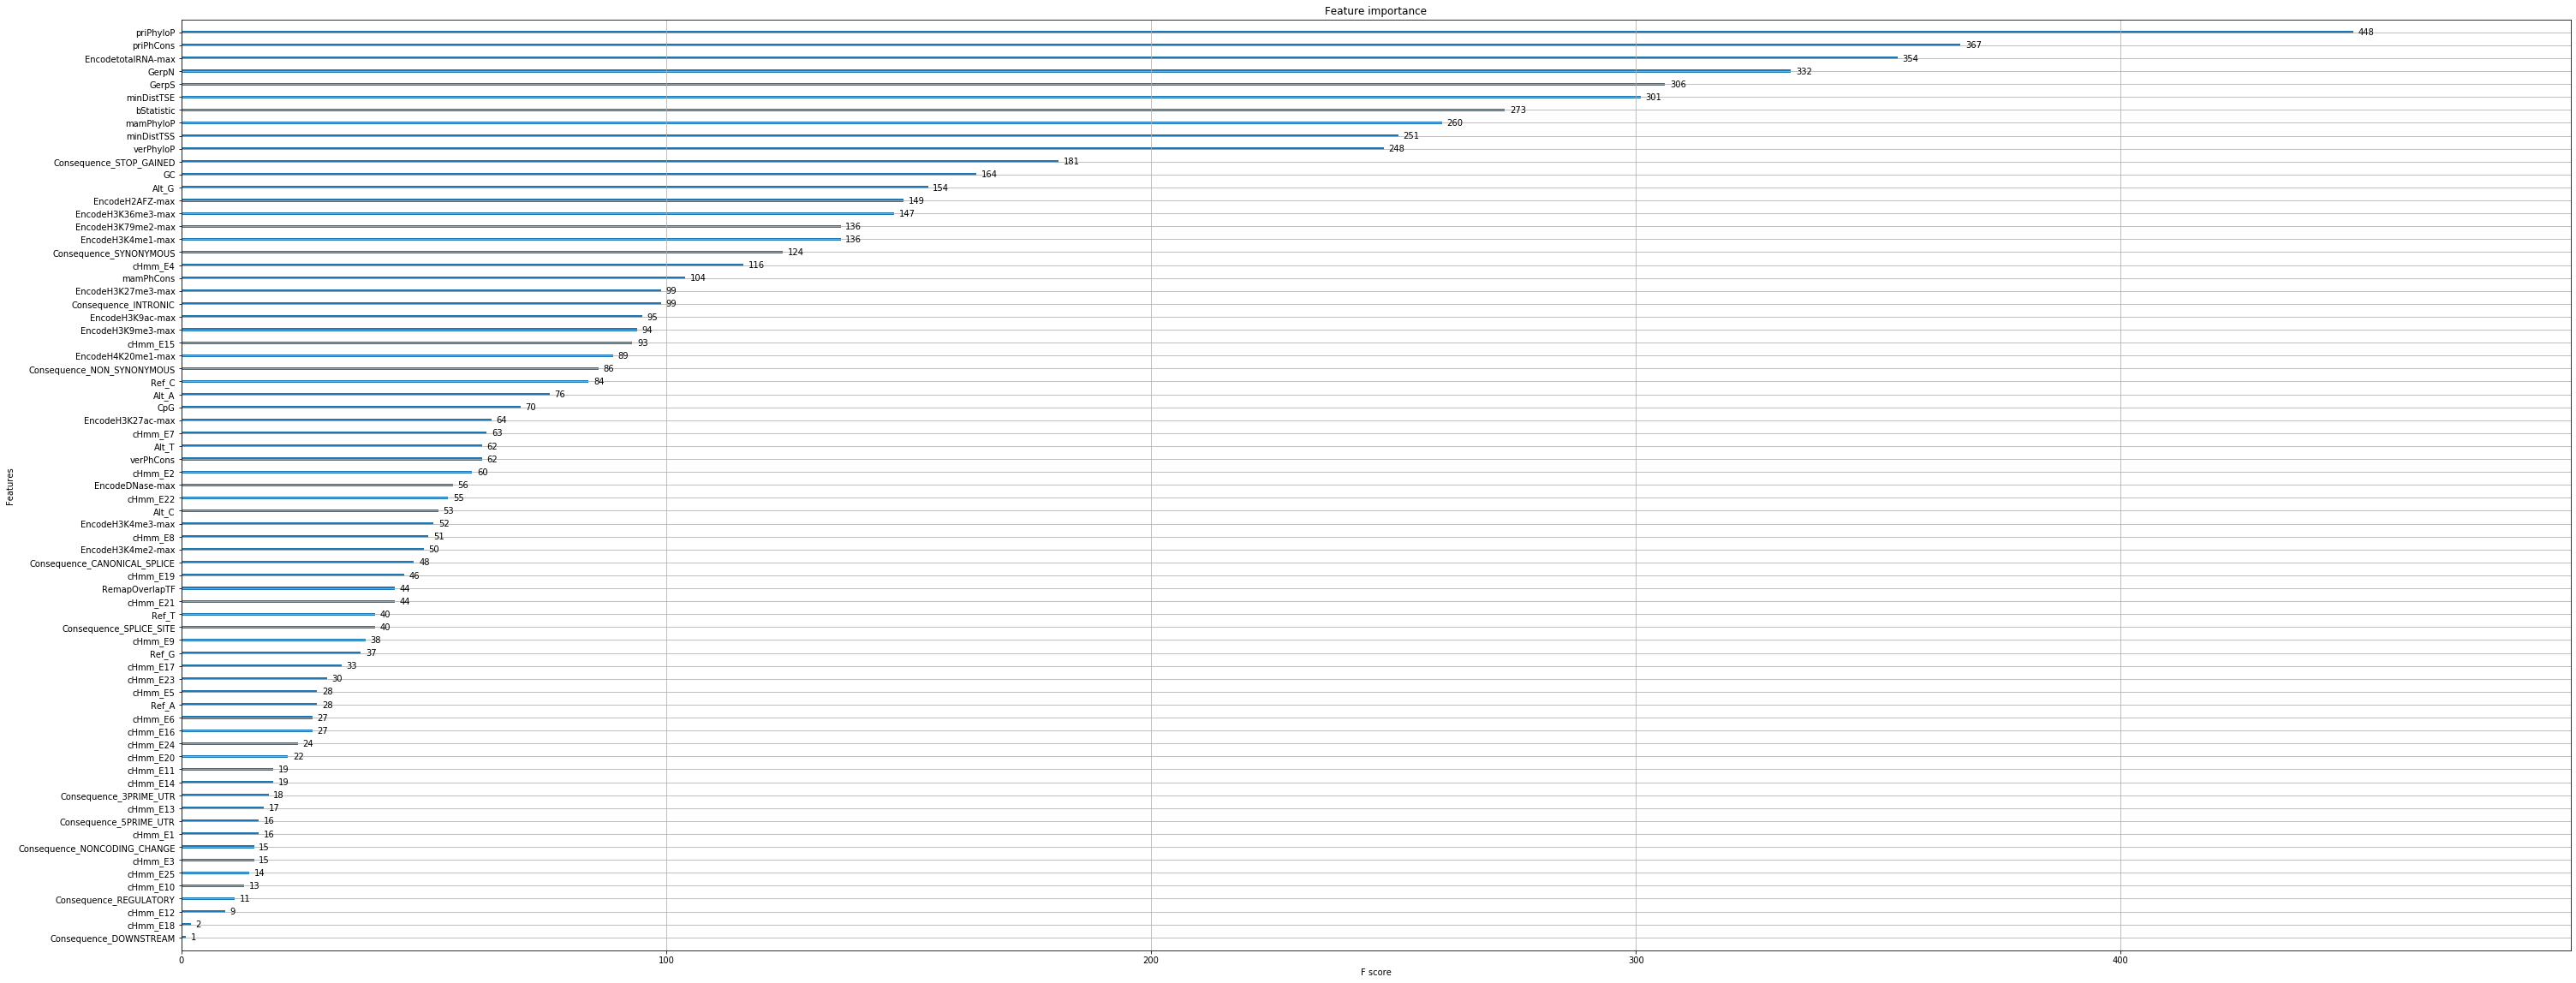

In [37]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.rcParams['figure.figsize'] = [ 50, 20]
plt.show()

# matrix evaluation¶
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

calculating classification accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

# calculating classification accuracy 
Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

In [38]:
from sklearn import model_selection

In [41]:
# Separating out the features
X = filtredAttributes.reindex(columns= filtredAttributes.loc[:, filtredAttributes.columns != 'category'].columns , fill_value=0).values
# Separating out the target
Y = filtredAttributes.reindex(columns=['category']).values

In [42]:

#cross validation 
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [43]:
# Cross Validation Classification Accuracy

scoring = 'accuracy'
results = model_selection.cross_val_score(xgb1, X, Y, cv=kfold, scoring=scoring)


/home/narumeena/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
results.mean()

0.9890529137269535

In [45]:
results.std()

0.004926985651340741

# ROC Curves
We can plot a ROC curve for a model in Python using the roc_curve() scikit-learn function.

The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
predicted = xgb1.predict(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.995


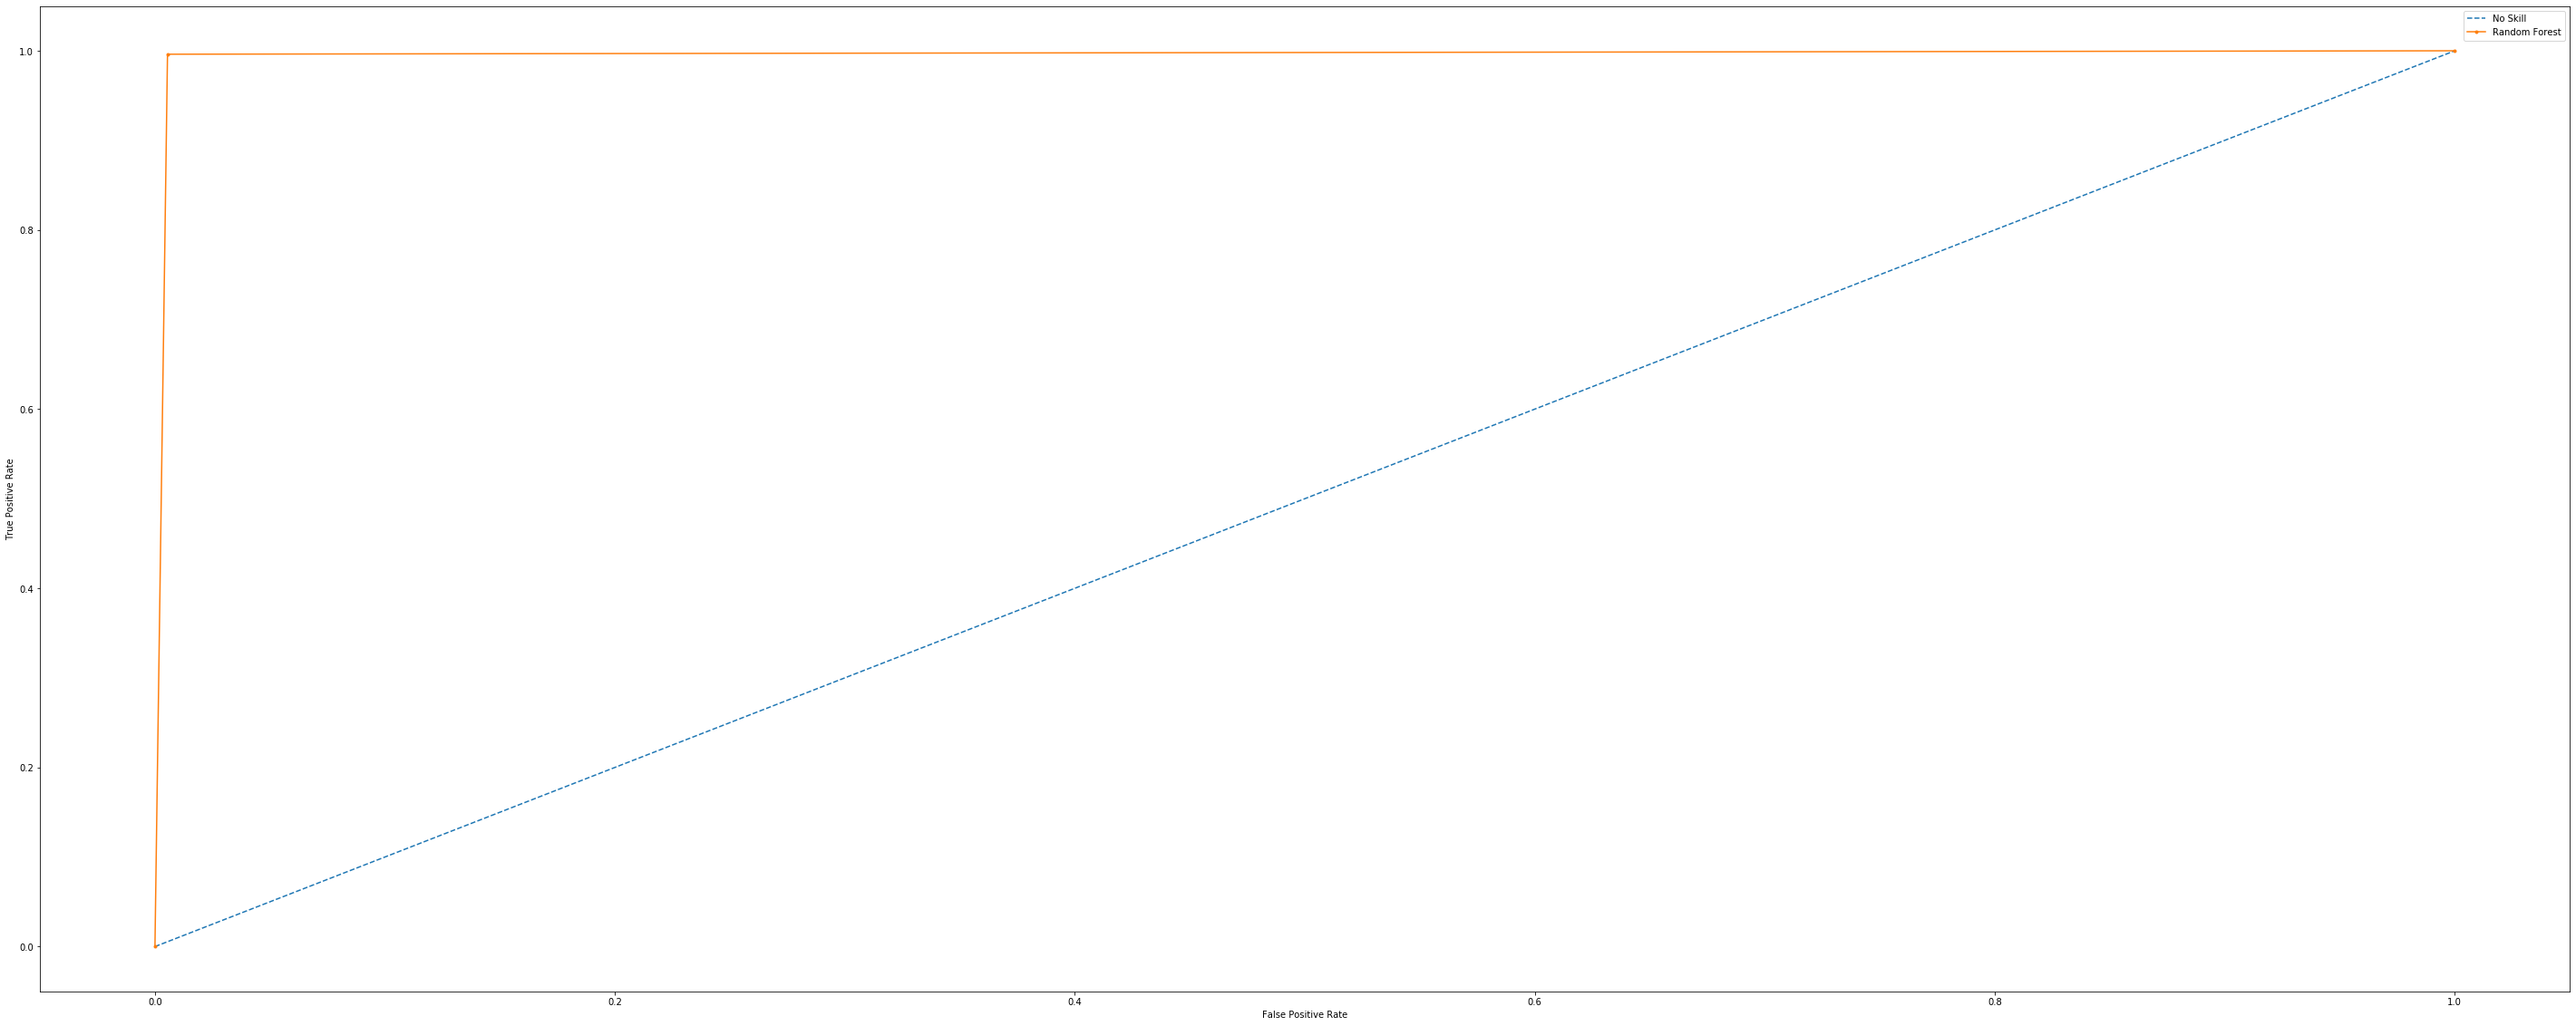

In [47]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]




# keep probabilities for the positive outcome only
#predicted = predicted[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, predicted)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, predicted)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Precision-Recall Curves
Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value. A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

There are also composite scores that attempt to summarize the precision and recall; two examples include:

F-Measure or F1 score: that calculates the harmonic mean of the precision and recall (harmonic mean because the precision and recall are rates). Area Under Curve: like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve. In terms of model selection, F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5), whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Logistic: f1=0.995 auc=0.996


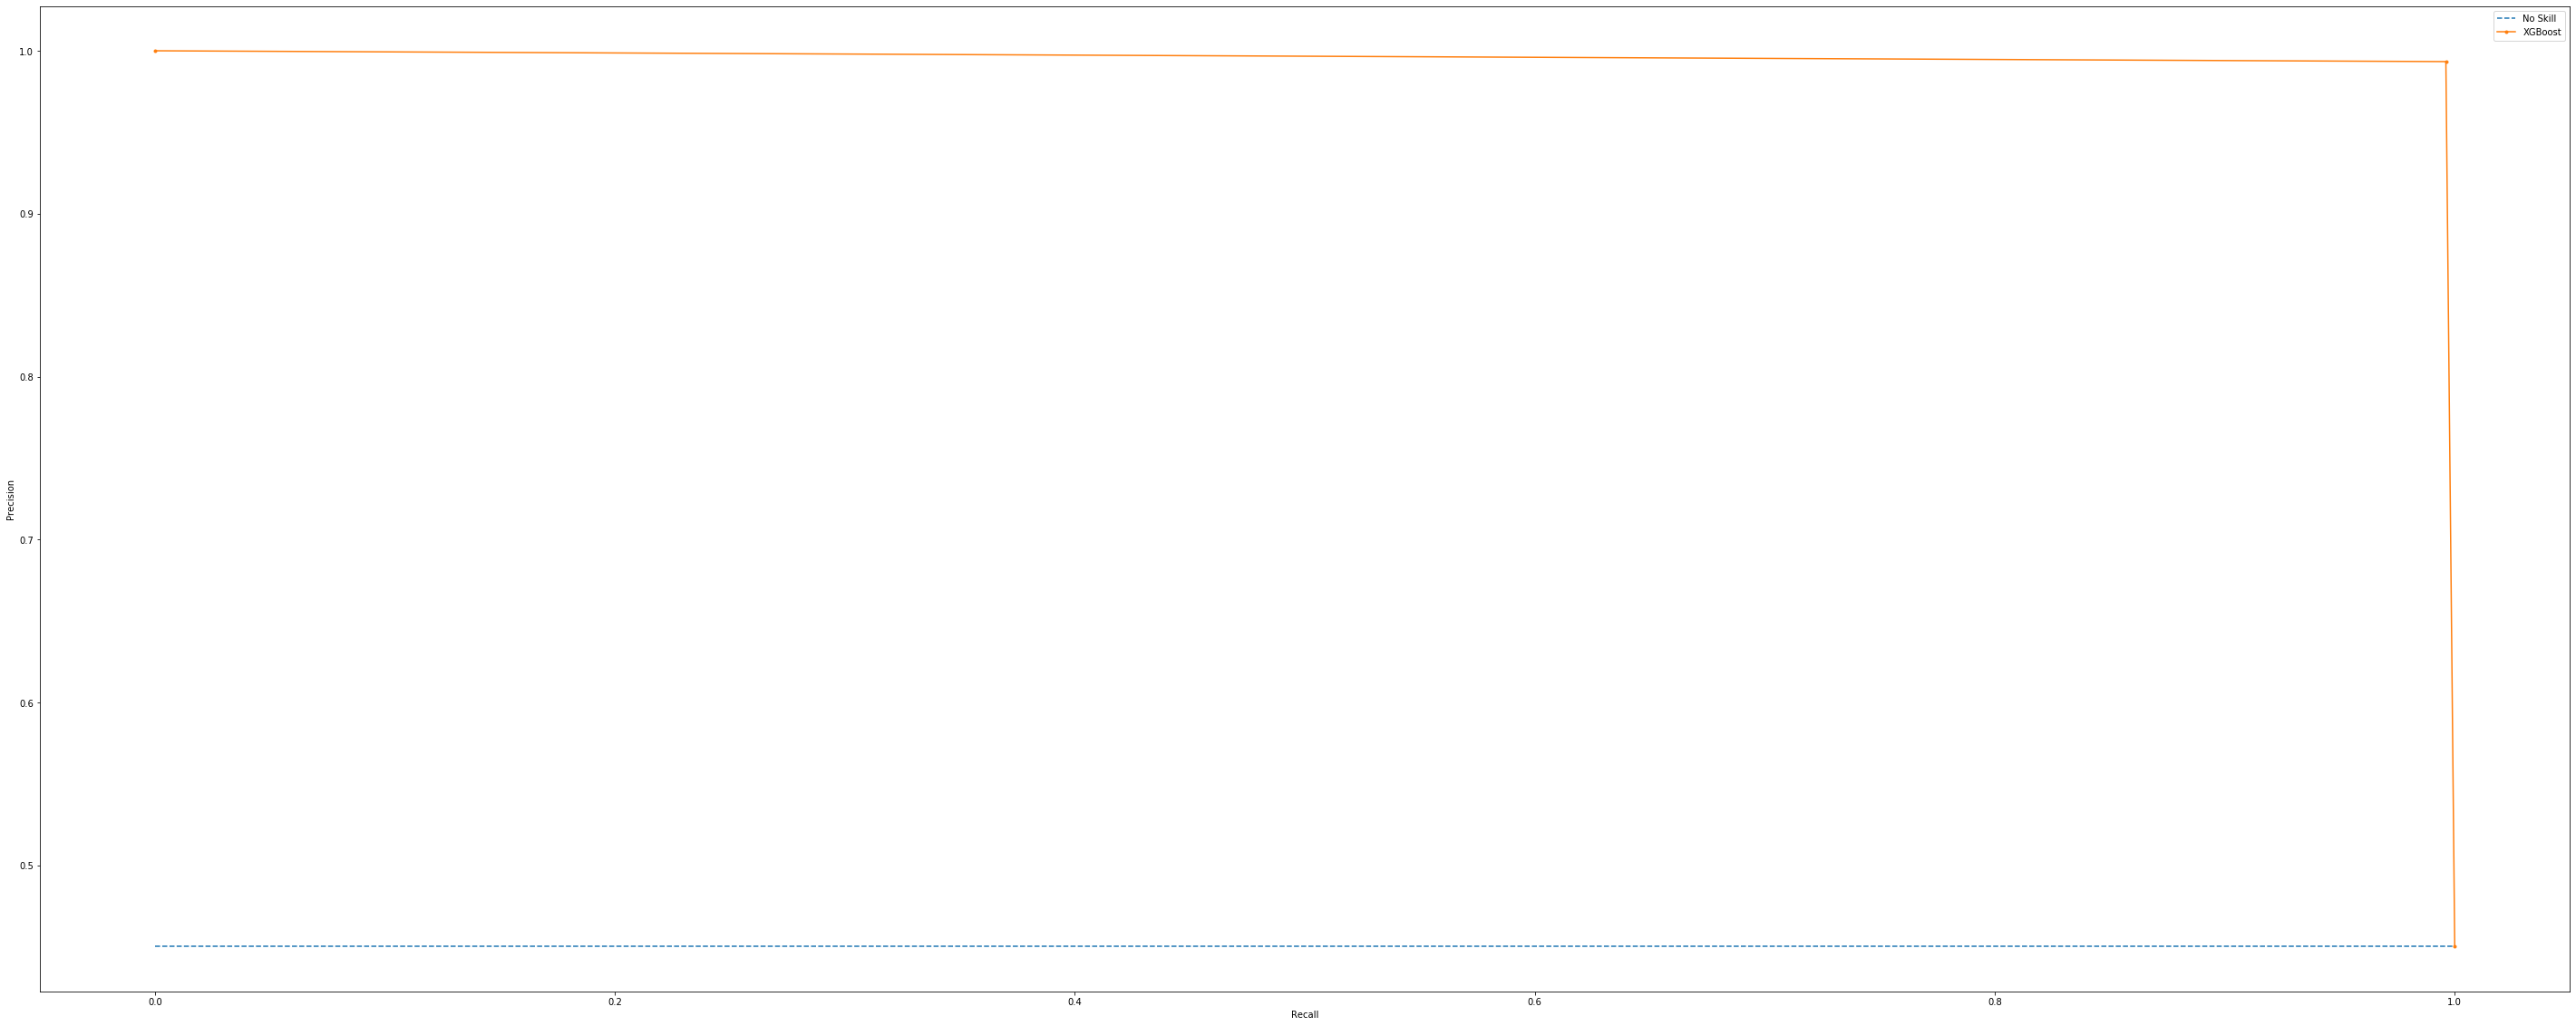

In [49]:
# predict class values
yhat = xgb1.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, predicted)
lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.

For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction=0 and actual=0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual=1. And so on.

In [50]:
from sklearn.metrics import confusion_matrix
predicted = xgb1.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[18958   104]
 [   60 15545]]


# Classification Report¶
Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The classification_report() function displays the precision, recall, f1-score and support for each class.

In [51]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19062
           1       0.99      1.00      0.99     15605

    accuracy                           1.00     34667
   macro avg       1.00      1.00      1.00     34667
weighted avg       1.00      1.00      1.00     34667



# with top five attributes 

In [56]:
# Remove the labels from the features
# axis 1 refers to the columns
features= fiveAttributes.drop('category', axis = 1)
features.head()

,minDistTSE,priPhCons,priPhyloP,bStatistic,GerpN,GerpS,EncodetotalRNA-max
0,185,0.011,-0.646,940.0,13.8,-27.7,9.02
1,185,0.011,-0.646,940.0,13.8,-27.7,9.02
2,2176,0.039,0.595,940.0,17.0,10.5,4.20
3,2176,0.039,0.595,940.0,17.0,10.5,4.20
4,1969,0.192,-1.149,745.0,18.1,10.9,2.89


In [57]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [58]:
#import necessary libraries
from xgboost import XGBClassifier

# fit model no training data
xgb1 = XGBClassifier(learning_rate = 0.08,
 n_estimators=352,
 max_depth=9,
colsample_bytree=0.4 ,subsample = 0.4)
xgb1.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=352, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

In [59]:
# make predictions for test set
y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred]

In [60]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.00%


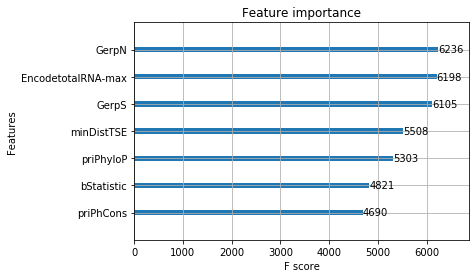

In [62]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xgb1)
plt.rcParams['figure.figsize'] = [ 50, 20]
plt.show()

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
predicted = xgb1.predict(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.980


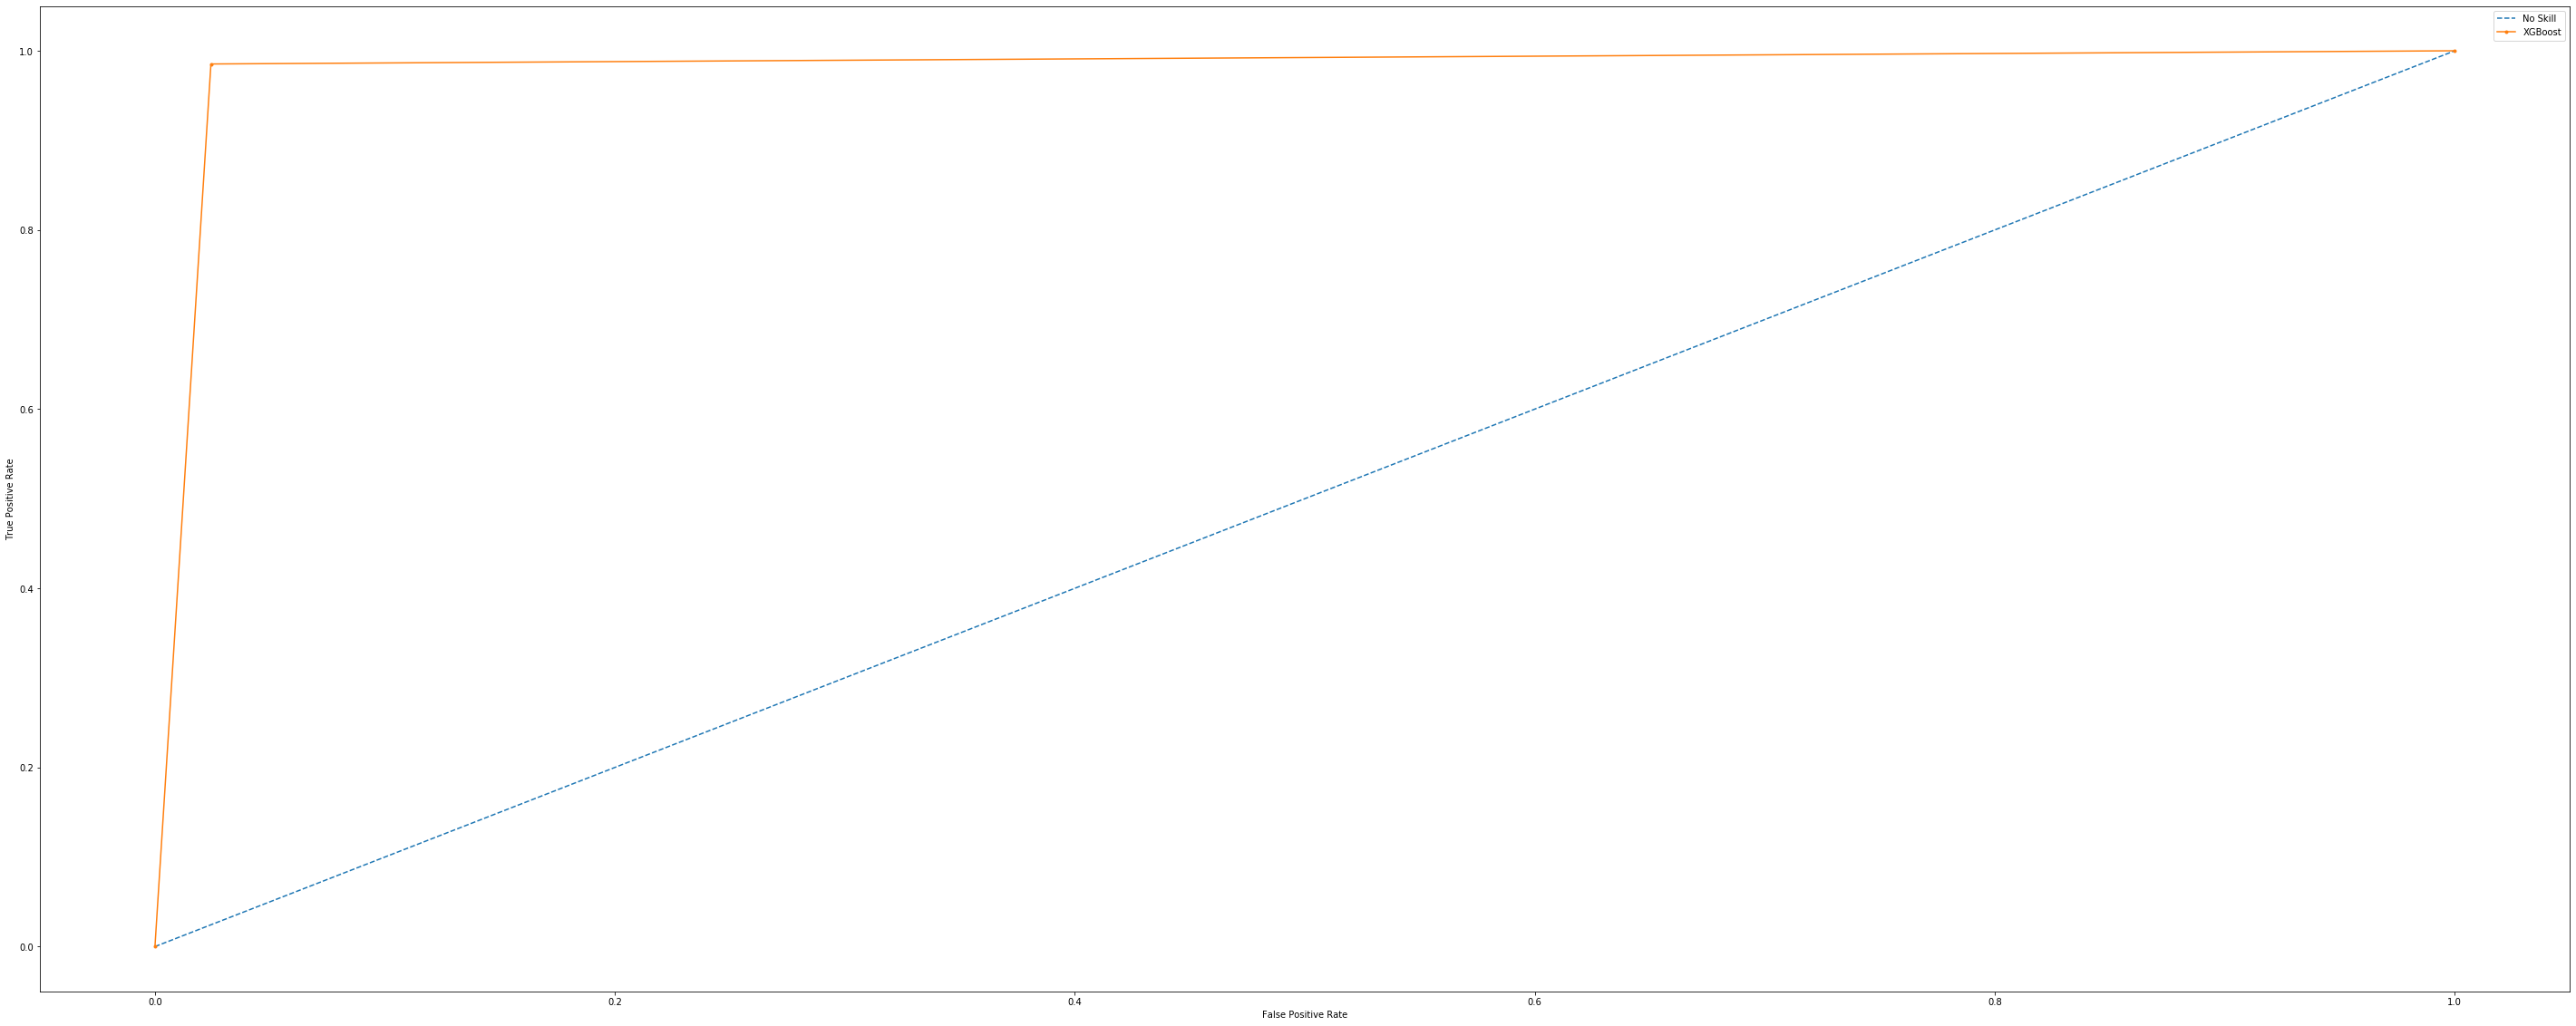

In [64]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]




# keep probabilities for the positive outcome only
#predicted = predicted[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, predicted)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, predicted)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()